<a href="https://colab.research.google.com/github/shardulgawande27/Dallal-Street-Mogul-PBL-/blob/main/ybi_internship_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Title of the project: Mileage Prediction**

Objectives: To predict fuel consumption in miles per gallon i.e mpg

Importing libraray

In [ ]:
import pandas as pd

Import data

In [ ]:
dataset = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/MPG.csv')

Describe data


In [ ]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
#as we can see horsepower column has null values, we drop them.
dataset  = dataset.dropna()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [ ]:
dataset.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


Data Visualization

In [ ]:
import seaborn as sns

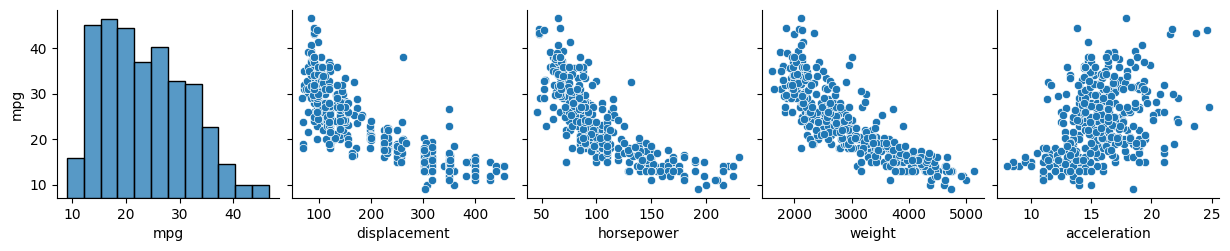

In [ ]:
#plotting graphs where yAxis is 'mpg' in each case.
sns.pairplot(dataset, x_vars = ['mpg',	'displacement',	'horsepower',	'weight',	'acceleration'], y_vars = ['mpg']);

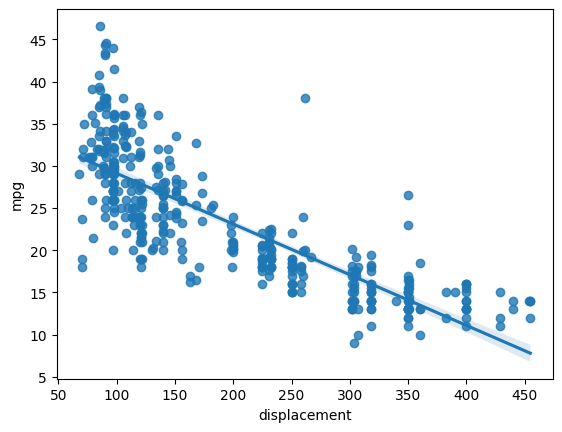

In [ ]:
sns.regplot(x = 'displacement', y = 'mpg', data = dataset);

Define Target Variable (y) and Feature Variables (X)

In [ ]:
dataset.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
y = dataset['mpg']
x = dataset[['displacement', 'horsepower', 'weight','acceleration']]

In [ ]:
x.shape, y.shape

((392, 4), (392,))

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2529)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((294, 4), (98, 4), (294,), (98,))

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Model Evaluation

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
model.intercept_

45.84620249789292

In [ ]:
model.coef_

array([-0.007859  , -0.05202824, -0.0048651 , -0.05998945])

In [ ]:
ypredict = model.predict(x_test)

In [ ]:
ypredict

array([18.45029029, 15.11872575, 14.25951901, 23.63777162, 29.77227939,
       23.78289678, 26.46274613, 24.63477759, 15.10361067, 11.92089347,
       24.03667612, 28.03774179, 31.7791986 , 31.04942136, 18.34939414,
       19.34562679, 28.14901371, 32.26833498, 31.23336778, 27.1706607 ,
       18.90264044, 22.69158865, 26.30616149, 32.53334114, 20.7455229 ,
        8.43604922, 21.96939005, 18.16644283, 24.9187207 , 14.95041612,
       23.27573018, 17.10008397,  9.28416594, 30.02859334, 20.49341373,
       29.16402497, 24.1851619 , 21.82468561, 10.45764414, 12.99758931,
       21.55287965, 19.9763373 ,  5.81701795, 17.83479167, 22.69872144,
       29.39987303, 13.2638446 , 25.84303202, 29.29886179, 22.44116443,
       22.30857618, 16.57432268, 24.06827363, 30.19019859, 10.04817173,
        9.3533171 , 28.14495274, 23.67665202, 20.07936568, 30.77322956,
       20.95405256, 26.72684739, 23.16157669, 14.10789682, 24.37223149,
       26.84731155, 15.26437637, 24.21355   , 30.81705563, 14.86

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,r2_score

In [ ]:
mean_squared_error(y_test,ypredict)

16.812242292122615

In [ ]:
mean_absolute_percentage_error(y_test,ypredict)

0.14486145216628077

In [ ]:
r2_score(y_test,ypredict)

0.7174961864188243

Since, the model has accuracy of 100-14 = 86%, we try other model to check whether it has more accuracy or not. How do we decide that? As we see in the graphs plotted above, the data points are in non-linear fashion, hence we use Polynomial regression. y= b0+b1x1+ b2x12+ b2x13+...... bnx1n. Here we convert original features to polynomial faetures.



In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)

here we change only features i.e. x and not y

In [ ]:
x_train2 = poly.fit_transform(x_train)

In [ ]:
x_test2 = poly.fit_transform(x_test)

In [ ]:
model.fit(x_train2,y_train)

LinearRegression()

In [ ]:
model.intercept_

72.7320952809056

In [ ]:
model.coef_

array([-5.47729530e-02, -2.06706710e-01, -9.71932491e-03, -7.27628614e-01,
        3.37627903e-04, -1.85343131e-06, -1.05601082e-04,  3.35845933e-05,
       -6.38028838e-03,  3.34982402e-04])

In [ ]:
ypredict_ = model.predict(x_test2)

Accuracy

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,r2_score

In [ ]:
mean_squared_error(y_test,ypredict_)

13.655336966767761

In [ ]:
mean_absolute_percentage_error(y_test,ypredict_)

0.11292169321633605

In [ ]:
r2_score(y_test,ypredict_)

0.7705431136538272

Here, accuracy is 100-11 = 89%. Hence we conclude Polynomial Regression is more accurate than Linear regression for this problem